<a href="https://colab.research.google.com/github/5SaGaR/Fine_tune_Bert/blob/main/Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [ ]:
!nvidia-smi

Sat Apr  8 03:03:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.12.0


In [ ]:
!pip install -q tensorflow==2.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 102.6 MB/s eta 0:00:00


In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 31.38 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
!pip install numpy==1.18

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 38.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.18.0-cp39-cp39-linux_x86_64.whl size=13112681 sha256=15096124dca77faaa80cf27da78af0b7738852a847bf9cf446438db2e3f7358d
  Stored in directory: /root/.cache/pip/wheels/32/11/2a/3b77bd53db68ee0fe15984dff74bc560151697f7b7ba0bcf4b
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.18.0 wh

In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.3/217.3 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 KB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [ ]:
import os
import pandas as pd


## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# test_df = pd.read_csv("/content/drive/MyDrive/test.csv.zip")

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [ ]:
# import re
# import string
# import numpy as np 
# import random
# import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import os
# import spacy
# import random
# from spacy.util import compounding
# from spacy.util import minibatch
# from collections import defaultdict
# from collections import Counter
# import keras
# from keras.models import Sequential
# from keras.initializers import Constant
# from keras.layers import (LSTM, 
#                           Embedding, 
#                           BatchNormalization,
#                           Dense, 
#                           TimeDistributed, 
#                           Dropout, 
#                           Bidirectional,
#                           Flatten, 
#                           GlobalMaxPool1D)
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.layers.embeddings import Embedding
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# from sklearn.metrics import (
#     precision_score, 
#     recall_score, 
#     f1_score, 
#     classification_report,
#     accuracy_score
# )



In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.11.0
Eager mode:  True
Hub version:  0.13.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',compression= 'zip', low_memory=False)


In [ ]:
df.shape

(1306122, 3)

<Axes: title={'center': 'Target distribution'}, ylabel='Frequency'>

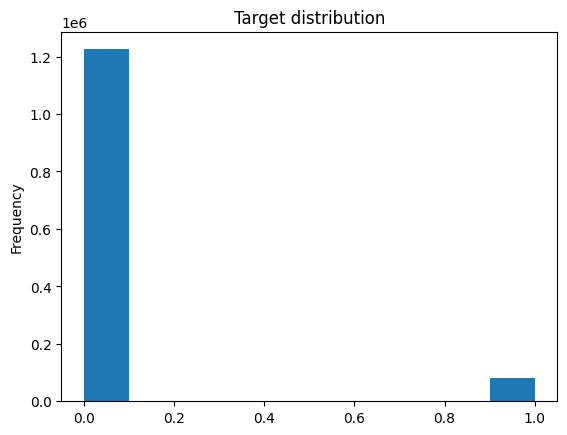

In [ ]:
df.target.plot(kind='hist', title='Target distribution')

In [ ]:
test_df

,qid,question_text,target
1184066,e808db89be9f27910cb1,Are transparent electrical circuit exists?,1
77777,0f39cb4433abb7d7d605,Why are coverts so messy unorganized in their ...,1
917997,b3e2676ace004eef892a,Why did the Americans interfere with the imper...,0
637609,7ce30cdfa1a3e9a78788,What programming languages/software/environmen...,0
65829,0ce9556646f852377d59,How can I prank someone through social media? ...,0
...,...,...,...
286933,382feb800c27c91091af,What is free speech? Is it same as free beer o...,0
39702,07c633896850138b993c,What are the latest immunotherapy treatments f...,0
780054,98ce3a637721d03e5f07,Where can I find the cheapest flights to New Y...,0
176724,228c5faaddb424bac053,Say a non-White foreigner from another country...,0


## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
train_df, remaining = train_test_split(df, random_state= 45, train_size = 0.008, stratify = df.target.values)
valid_df, _ = train_test_split(remaining, random_state=45, train_size=0.0008,stratify = remaining.target.values)
test_df, y = train_test_split(remaining, random_state=45, train_size=0.0008,stratify = remaining.target.values) 
train_df.shape,valid_df.shape,test_df.shape


((10448, 3), (1036, 3), (1036, 3))

In [ ]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['question_text'].values, valid_df['target'].values))
  test_data = tf.data.Dataset.from_tensor_slices((test_df['question_text'].values, test_df['target'].values))

  for text,label in train_data.take(3):
    print(text)
    print(label)

tf.Tensor(b'Who has initiated the incest relation. Mom or you?', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b'What is the order of rotation of rectangle?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'Which is the top university in Dubai?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [ ]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list=[0,1]# Label categories
max_seq_length=128# maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",trainable=True)

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you?'))

[7632, 29623, 2129, 2024, 2017, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [ ]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
 example = classifier_data_lib.InputExample(guid=None,
                                            text_a = text.numpy(),
                                            text_b = None,
                                            label = label.numpy())
 feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

 return (feature.input_ids, feature.input_mask, feature.segment_ids,feature.label_id) 


You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],
                                                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])
  x = {
      'input_word_ids': input_ids,
       'input_mask': input_mask,
       'input_type_ids':segment_ids
  }

  return(x, label_id)
  
                                                                
  

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [ ]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle(100)
  .batch(32, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))
  # valid
  valid_data = (valid_data.map(to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))
  # #test
  # test_data = (test_data.map(to_feature_map,
  #                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
  # .batch(32, drop_remainder=True)
  # .prefetch(tf.data.experimental.AUTOTUNE))
  
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [ ]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                         name='input_word_ids')
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                         name='input_mask')
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                         name='input_type_ids')model
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
  drop = tf.keras.layers.Dropout(0.45)(pooled_output)
  output = tf.keras.layers.Dense(1, activation='sigmoid',name='output')(drop)

  model = tf.keras.Model(
      inputs={
          'input_word_ids': input_word_ids,
          'input_mask': input_mask,
          'input_type_ids': input_type_ids         
      },
      outputs=output
  )
  return model

## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_addons as tfa

In [ ]:
model = create_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      tfa.metrics.F1Score(num_classes=2, 
                      average='micro',
                      threshold=0.4),
                      # tf.keras.metrics.Recall(name='recall', thresholds=1, class_id=1)
                      ])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',       

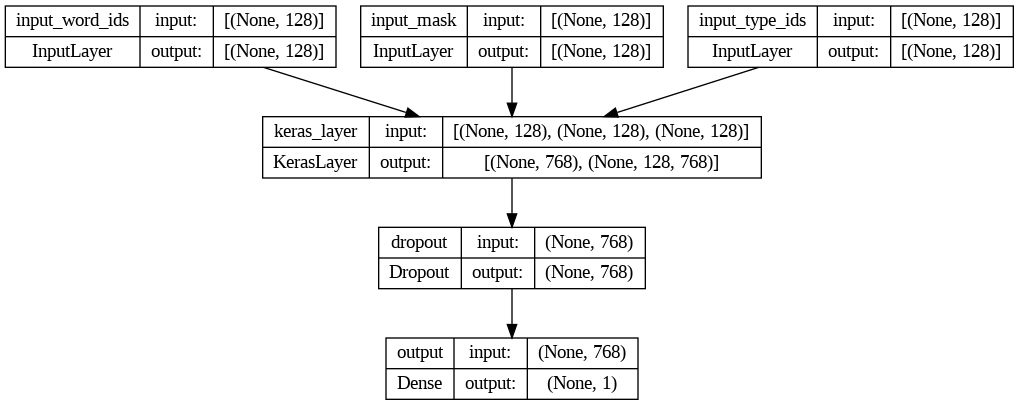

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True)

In [ ]:
# Train model
epochs = 7
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)


Epoch 1/7
326/326 [==============================] - 307s 825ms/step - loss: 0.1990 - binary_accuracy: 0.9353 - f1_score: 0.3952 - val_loss: 0.1225 - val_binary_accuracy: 0.9541 - val_f1_score: 0.5577
Epoch 2/7
326/326 [==============================] - 266s 816ms/step - loss: 0.1178 - binary_accuracy: 0.9552 - f1_score: 0.6185 - val_loss: 0.1103 - val_binary_accuracy: 0.9590 - val_f1_score: 0.6325
Epoch 3/7
326/326 [==============================] - 268s 821ms/step - loss: 0.1084 - binary_accuracy: 0.9588 - f1_score: 0.6591 - val_loss: 0.1067 - val_binary_accuracy: 0.9609 - val_f1_score: 0.6667
Epoch 4/7
326/326 [==============================] - 266s 817ms/step - loss: 0.0953 - binary_accuracy: 0.9621 - f1_score: 0.6950 - val_loss: 0.1077 - val_binary_accuracy: 0.9580 - val_f1_score: 0.6446
Epoch 5/7
326/326 [==============================] - 268s 821ms/step - loss: 0.0928 - binary_accuracy: 0.9646 - f1_score: 0.7128 - val_loss: 0.1074 - val_binary_accuracy: 0.9600 - val_f1_score: 0.

## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

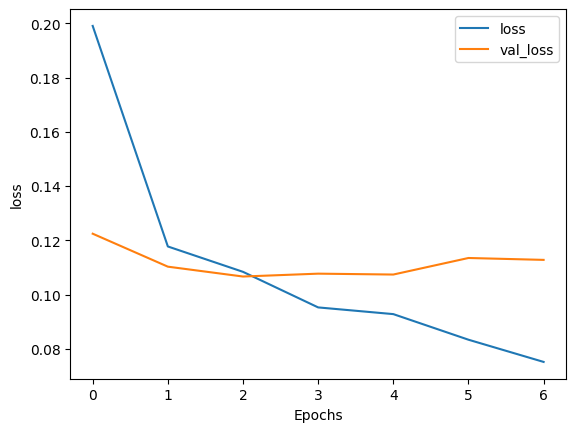

In [ ]:
plot_graphs(history,'loss')

In [ ]:
test_data = (test_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
.batch(32, drop_remainder=True)
.prefetch(tf.data.experimental.AUTOTUNE))


TypeError: ignored

In [ ]:
# tf.shape(test_data)

In [ ]:
test_df.shape

(1036, 3)

In [ ]:
n = int(test_df.shape[0] - test_df.shape[0]%32)
y_test = test_df.head(n)
y_test

,qid,question_text,target
1184066,e808db89be9f27910cb1,Are transparent electrical circuit exists?,1
77777,0f39cb4433abb7d7d605,Why are coverts so messy unorganized in their ...,1
917997,b3e2676ace004eef892a,Why did the Americans interfere with the imper...,0
637609,7ce30cdfa1a3e9a78788,What programming languages/software/environmen...,0
65829,0ce9556646f852377d59,How can I prank someone through social media? ...,0
...,...,...,...
764138,95b51ff796d929bf3176,Is it possible to insert life in a dead animal?,0
1290027,fcd3859607c08ff084fe,How does filling out a customer service survey...,0
202339,278acaa0ed5e8787424f,Is it worthy to make a homemade astronomical t...,0
905972,b1859e52043cfbc65b4c,What is the importance of relaxing?,0


In [ ]:
y_test=y_test['target']
y_test

1184066    1
77777      1
917997     0
637609     0
65829      0
          ..
764138     0
1290027    0
202339     0
905972     0
1053574    0
Name: target, Length: 1024, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
y_pred = model.predict(test_data)



32/32 [==============================] - 9s 276ms/step


In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_pred.shape

(1024, 1)

In [ ]:
y_pred_bool = np.where(y_pred < 0.4, 0, 1)

In [ ]:
from sklearn.metrics import precision_score, recall_score

# set zero_division to 1 to avoid the warning
precision=precision_score(y_test, y_pred_bool, zero_division=1)
recall=recall_score(y_test, y_pred_bool, zero_division=1)

accuracy = accuracy_score(y_test, y_pred_bool)
print(f"Test accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_bool))

Test accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       960
           1       0.73      0.56      0.64        64

    accuracy                           0.96      1024
   macro avg       0.85      0.77      0.81      1024
weighted avg       0.96      0.96      0.96      1024



In [ ]:
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Precision: 0.73
Recall: 0.56


In [ ]:
y_test

1184066    1
77777      1
917997     0
637609     0
65829      0
          ..
764138     0
1290027    0
202339     0
905972     0
1053574    0
Name: target, Length: 1024, dtype: int64

In [ ]:
type(y_pred)

numpy.ndarray

<Axes: >

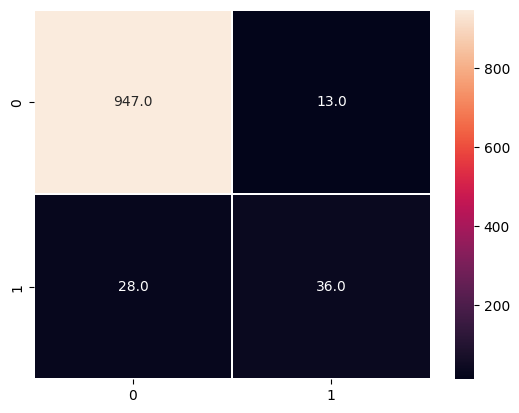

In [ ]:
confution_lg = confusion_matrix(y_test, y_pred_bool) #confusion metrics
sns.heatmap(confution_lg, linewidths=0.01, annot=True,fmt= '.1f', color='red')